# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The No Show Appointment dataset consist of patients' demographic and health information (14 associated variables or characteristics) collected from approximately 110,527 medical appointments in Brazil. The dataset is focused on answering the question of whether or not the patients show up for their appointments. The following information below are contained in the patients' data:
> - Patient Identification Number
> - Appointment Identifier
> - Gender (Male M or Female F)
> - Scheduled Day of Appointment
> - Appointment Day
> - Age of Patients
> - Neighbourhood (Where the hospitals are located)
> - Scholarship (If patients are enrolled in the [Brasilian welfare program Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia))
> - Hipertension (Hypertension)
> - Diabetes
> - Alcoholism
> - Handcap
> - SMS Received as reminders
> - No-show: __‘No’__ if the patient showed up, or __‘Yes’__ if they did not show up to their appointment

_Reference for Dataset on [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments)_ 


### Question(s) for Analysis

**Question One**: What are the demographic distributions of the patients?
> _- By Age Group_
> _- By Gender_
> _- By Scholarship_
> _- By Health Conditions_
> _- By Physical Disability_
> _- By SMS Received_
> _- By No Show for Appointments_

**Question Two**: Is there any impact of the health conditions on attendance at appoinment by the patients? _Are chronic illnesses like hypertension and diabetes affecting patient's absences?_

**Question Three**: Does scheduling impact their attendance at the appointments? _Is the period between scheduled day and appointment day affecting the number of no-show appointments?_

**Question Four**: Do SMS reminders decrease the number of absences? _Do SMS reminders increase the attendance on appointment days?_ 

<a id='wrangling'></a>
## Data Wrangling

In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
#df = pd.read_csv('noshowappointments.csv')
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **Checking for the dimensions of the dataset**

In [3]:
df.shape

(110527, 14)

In [4]:
print(f"The shape of the dataset is {df.shape}, with {df.shape[0]} rows/observations and {df.shape[1]} columns/variables")

The shape of the dataset is (110527, 14), with 110527 rows/observations and 14 columns/variables


> **Checking the dataset for rows with missing/null values and datatypes**

In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- _The dataset does not have any row(s) with null values along the columns_
- _The dataset has 9 variables as either int64 or float which are important in the description of the data_
- _The 'ScheduledDay' and 'AppointmentDay' are objects to be converted to datetime_

> **Checking the dataset for duplicated rows**

In [7]:
df.duplicated().sum()

0

- _The dataset does not have any duplicated rows_

> **Describing the dataset**

In [8]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

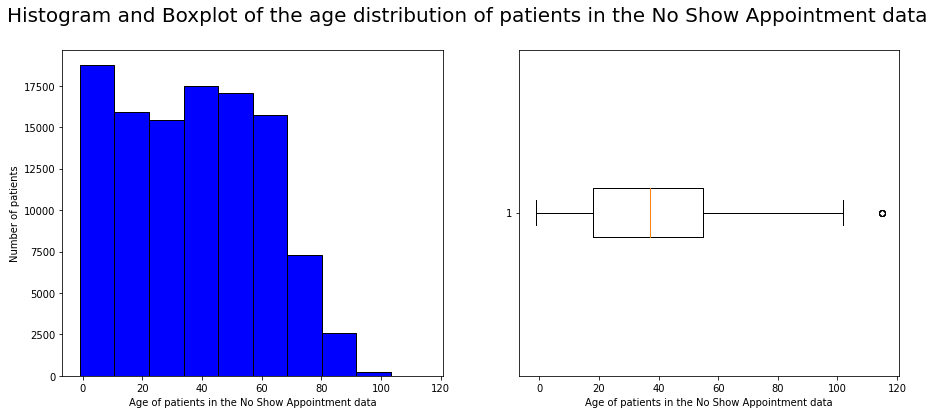

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].hist(df['Age'], color = 'blue', edgecolor = 'black');
ax[1].boxplot(df['Age'], vert=False);
ax[0].set_xlabel('Age of patients in the No Show Appointment data');
ax[0].set_ylabel('Number of patients');
ax[1].set_xlabel('Age of patients in the No Show Appointment data');
fig.suptitle('Histogram and Boxplot of the age distribution of patients in the No Show Appointment data', fontsize=20);

In [10]:
## How many outliers in the data based on the age distribution of the patients
Q3 = np.quantile(df['Age'], 0.75)
Q1 = np.quantile(df['Age'], 0.25)
lower_boundary = Q1 - 1.5 *(Q3-Q1)
upper_boundary = Q3 + 1.5 *(Q3-Q1)
print(f"There are {len(df[df['Age'] < lower_boundary])} outliers lesser than the lower boundary of {lower_boundary}")
print(f"There are {len(df[df['Age'] > upper_boundary])} outliers greater than the upper boundary of {upper_boundary}")

There are 0 outliers lesser than the lower boundary of -37.5
There are 5 outliers greater than the upper boundary of 110.5


In [11]:
#Get unique values for each variables
for i in df[['Age','Gender', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']].columns:
    print(i)
    print(df[i].unique())
    print('\n')

Age
[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


Gender
['F' 'M']


Neighbourhood
['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIV

In [12]:
## How many rows contain the negative age for patients
len(df[df['Age'] < 0])

1

In [13]:
## How many rows contain wrong handicap designation of more than 1
len(df[df['Handcap'] > 1])

199

- _The mean(sd) age of the patients is 37(23), indicating a large spread of the age of the patients around the mean and a large subset of the population are less than the mean/median age_
- _The dataset contains outliers based on the patient age (indicating patients who are very old) - the maximum age is far from the 75percentile_
- _The dataset contains patient(s) negatively aged '-1'. This cannot be the true age (possibly a mistake at entry)_
- _The dataset contains patient(s) with wrong handicap designation of more than 1 (It should be True[1] or False[0])_

### Data Cleaning
> * All the rows in the dataset have no-missing/complete values. No need for dropping or filling the rows.
> * The No Show Appointment dataset has a relatively large number of observations (110,527). I would be dropping the rows observed to contains negative age (1 row), outliers (5 rows), and wrong handicap designation (199 rows). These rows make up about 205 out of 110,527 (0.002%) of the data.
> * The 'ScheduledDay' and 'AppointmentDay' columns are to be converted to datetimes.

In [14]:
# After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section.

> Dropping row(s) with negative age '-1'

In [15]:
# Drop 1 rows with negative age using the index
df.drop(df[df['Age'] < 0].index, inplace=True)

In [16]:
# Confirm the updated number of rows after dropping the rows with negative age
print(len(df))

110526


> Dropping row(s) with age outliers

In [17]:
# Drop 5 rows with age greater than the upper boundary using the index
df.drop(df[df['Age'] > upper_boundary].index, inplace=True)

In [18]:
# Confirm the updated number of rows after dropping the rows with outliers
print(len(df))

110521


> Dropping row(s) with wrong handicap designations

In [19]:
# Drop 199 rows with age greater than the upper boundary using the index
df.drop(df[df['Handcap'] > 1].index, inplace=True)

In [20]:
# Confirm the updated number of rows after dropping the rows with wrong handicap designations
print(len(df))

110322


> Convert 'ScheduledDay' and 'AppointmentDay' columns to pandas datetime

In [21]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [22]:
# Confirm the updated modifications on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110322 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110322 non-null  float64            
 1   AppointmentID   110322 non-null  int64              
 2   Gender          110322 non-null  object             
 3   ScheduledDay    110322 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110322 non-null  datetime64[ns, UTC]
 5   Age             110322 non-null  int64              
 6   Neighbourhood   110322 non-null  object             
 7   Scholarship     110322 non-null  int64              
 8   Hipertension    110322 non-null  int64              
 9   Diabetes        110322 non-null  int64              
 10  Alcoholism      110322 non-null  int64              
 11  Handcap         110322 non-null  int64              
 12  SMS_received    110322 non-null  int64              
 13  No-show       

In [23]:
# Reset dataframe index to present a working dataframe
df.reset_index(inplace=True)

In [24]:
# Rename columns
# Hipertension -> Hypertension
# Handcap -> Handicap
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}, inplace=True);

In [25]:
df.tail()

,index,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
110317,110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110318,110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110319,110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110320,110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No
110321,110526,3.775115e+14,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No


> _End of Data Wrangling_

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What are the demographic distributions of the patients?)
> _- By Age Group_
> _- By Gender_
> _- By Scholarship_
> _- By Health Conditions_
> _- By Physical Disability_
> _- By SMS Received_
> _- By No Show for Appointments_

In [26]:
## Defined function for exploratory data analysis
def BreakDownByColumn(df, col):
    output_dataframe = pd.DataFrame(df[col].value_counts())
    #output_dataframe.iloc['Total'] = df[col].count()
    return output_dataframe

# Age categorization
def AgeGroups(age):
    if age <= 1:
        agegrp = 'Infant'
    elif age >= 2 and age <= 4:
        agegrp = 'Toddler'
    elif age >= 5 and age <= 12:
        agegrp = 'Child'
    elif age >= 13 and age <= 19:
        agegrp = 'Teen'
    elif age >= 20 and age <= 59:
        agegrp = 'Adult'
    else:
        agegrp = 'Senior Adult'
    return agegrp

_Reference for age grouping retrieved from [©2022 INTEGRIS Health Oklahoma's largest hospital network](https://integrisok.com/resources/on-your-health/2015/october/stages-of-life-health-for-every-age)_

In [27]:
## Distribution of patient based on each variable in the dataset
# Reformat the dataset to provide 
dfpie = df[['Age', 'Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show']].copy()
dfpie['AgeGrp'] = dfpie['Age'].apply(AgeGroups)
dfpie['Gender'] = dfpie['Gender'].apply(lambda x : 'Male' if x=='M' else 'Female')
dfpie['Scholarship'] = dfpie['Scholarship'].apply(lambda x : 'Yes, On Scholarship' if x==1 else 'No Scholarship')
dfpie['Hypertension'] = dfpie['Hypertension'].apply(lambda x : 'Yes, have Hypertension' if x==1 else 'No Hypertension')
dfpie['Diabetes'] = dfpie['Diabetes'].apply(lambda x : 'Yes, have Diabetes' if x==1 else 'No Diabetes')
dfpie['Alcoholism'] = dfpie['Alcoholism'].apply(lambda x : 'Yes, an Alcoholic' if x==1 else 'Non-Alcoholic')
dfpie['Handicap'] = dfpie['Handicap'].apply(lambda x : 'Yes, Physically Disabled' if x==1 else 'No Disability')
dfpie['SMS_received'] = dfpie['SMS_received'].apply(lambda x : 'Yes, Received' if x==1 else 'No SMS')
dfpie['No-show'] = dfpie['No-show'].apply(lambda x : 'Yes, Absent' if x=='Yes' else 'No, Present')
dfpie.head()

,Age,Gender,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,AgeGrp
0,62,Female,No Scholarship,"Yes, have Hypertension",No Diabetes,Non-Alcoholic,No Disability,No SMS,"No, Present",Senior Adult
1,56,Male,No Scholarship,No Hypertension,No Diabetes,Non-Alcoholic,No Disability,No SMS,"No, Present",Adult
2,62,Female,No Scholarship,No Hypertension,No Diabetes,Non-Alcoholic,No Disability,No SMS,"No, Present",Senior Adult
3,8,Female,No Scholarship,No Hypertension,No Diabetes,Non-Alcoholic,No Disability,No SMS,"No, Present",Child
4,56,Female,No Scholarship,"Yes, have Hypertension","Yes, have Diabetes",Non-Alcoholic,No Disability,No SMS,"No, Present",Adult


In [28]:
## How many males and females are in the dataset
BreakDownByColumn(df, 'Gender')

,Gender
F,71725
M,38597


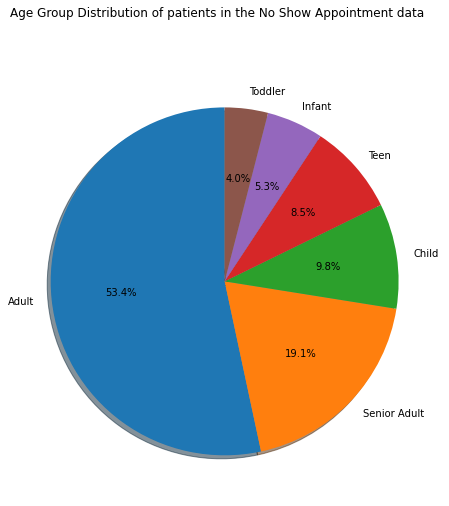

In [29]:
# Create a pie plot of the age groups
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.pie(dfpie['AgeGrp'].value_counts(), labels=dfpie['AgeGrp'].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=90)
fig.suptitle('Age Group Distribution of patients in the No Show Appointment data');

In [30]:
## How many males and females are in the dataset across the age groups
crosstab_ag = pd.crosstab(dfpie['AgeGrp'], dfpie['Gender']).reindex(['Infant', 'Toddler', 'Child', 'Teen', 'Adult', 'Senior Adult'])
crosstab_ag['FemaleThanMale'] = crosstab_ag.Female > crosstab_ag.Male
crosstab_ag

Gender,Female,Male,FemaleThanMale
AgeGrp,,,
Infant,2809,3003,False
Toddler,2138,2290,False
Child,5066,5708,False
Teen,6044,3303,True
Adult,41421,17444,True
Senior Adult,14247,6849,True


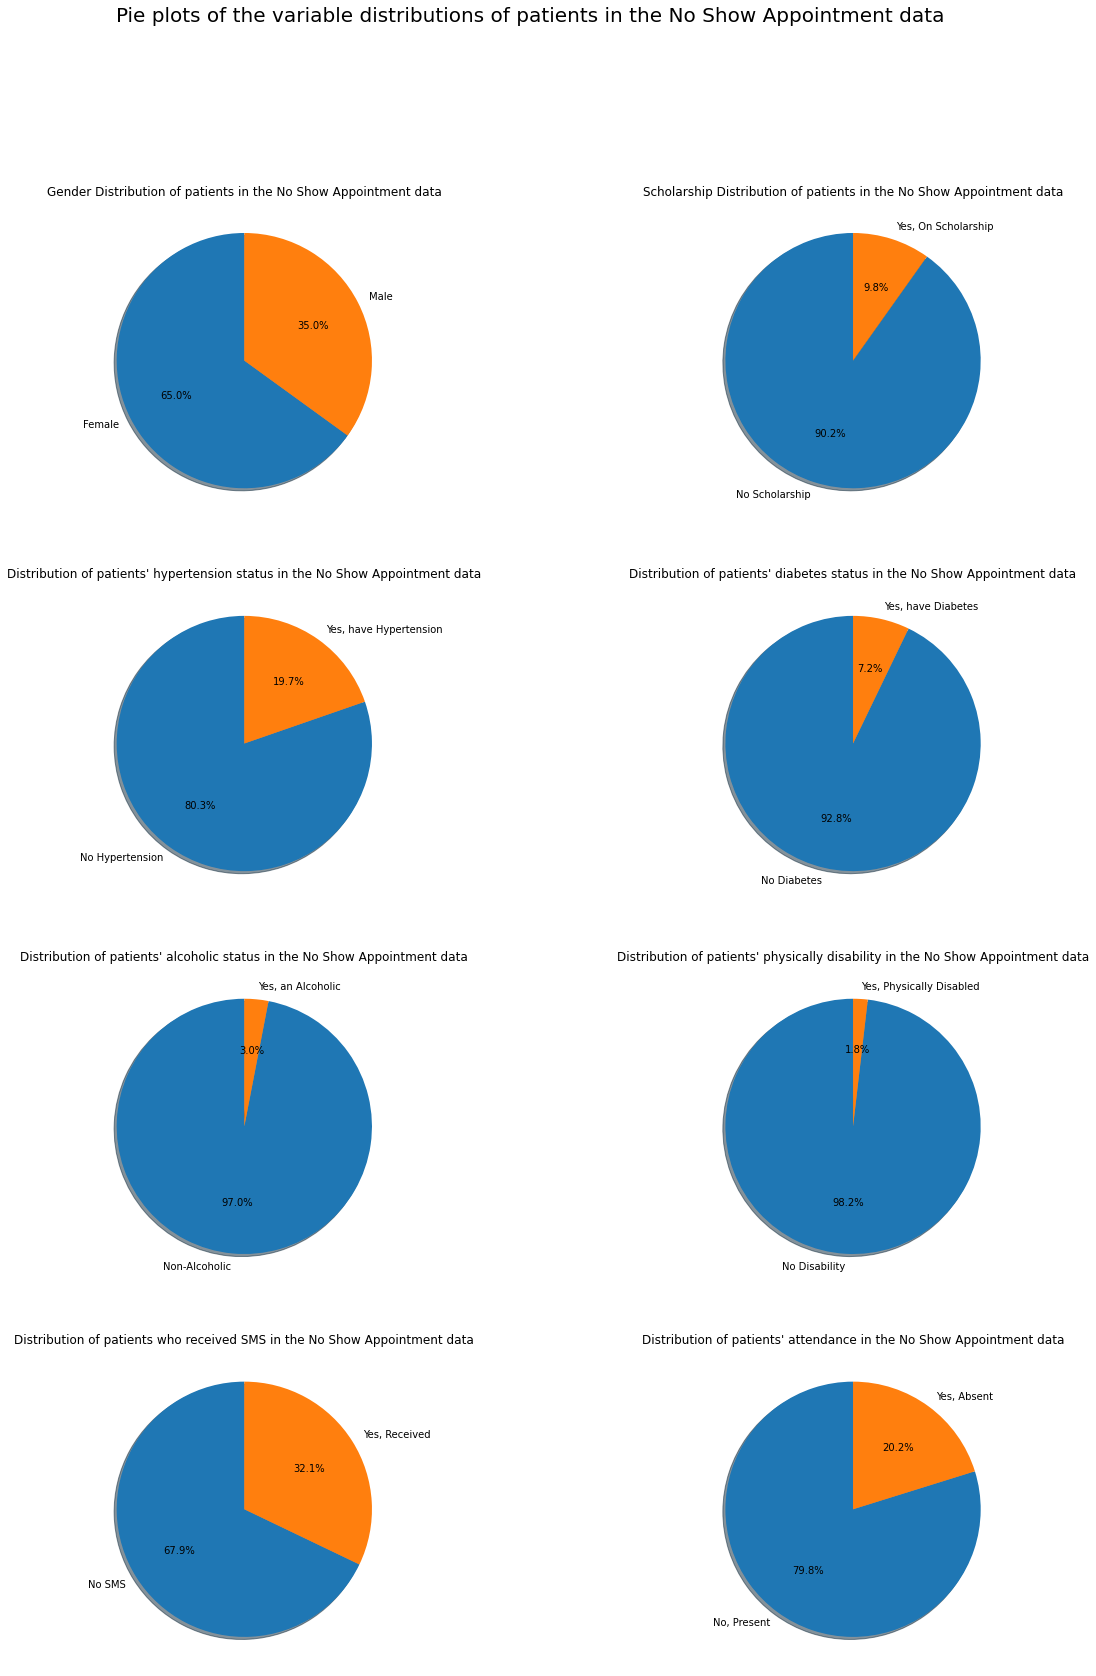

In [31]:
# Create individual pie plots showing the portion of each variables 
fig, ax = plt.subplots(4, 2, figsize=(20, 27))
ax[0,0].pie(dfpie['Gender'].value_counts(), labels=dfpie['Gender'].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[0,0].set_title('Gender Distribution of patients in the No Show Appointment data');
ax[0,1].pie(dfpie['Scholarship'].value_counts(), labels=dfpie['Scholarship'].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[0,1].set_title('Scholarship Distribution of patients in the No Show Appointment data');
ax[1,0].pie(dfpie['Hypertension'].value_counts(), labels=dfpie['Hypertension'].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[1,0].set_title('Distribution of patients\' hypertension status in the No Show Appointment data');
ax[1,1].pie(dfpie['Diabetes'].value_counts(), labels=dfpie['Diabetes'].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[1,1].set_title('Distribution of patients\' diabetes status in the No Show Appointment data');
ax[2,0].pie(dfpie['Alcoholism'].value_counts(), labels=dfpie['Alcoholism'].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[2,0].set_title('Distribution of patients\' alcoholic status in the No Show Appointment data');
ax[2,1].pie(dfpie['Handicap'].value_counts(), labels=dfpie['Handicap'].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[2,1].set_title('Distribution of patients\' physically disability in the No Show Appointment data');
ax[3,0].pie(dfpie['SMS_received'].value_counts(), labels=dfpie['SMS_received'].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[3,0].set_title('Distribution of patients who received SMS in the No Show Appointment data');
ax[3,1].pie(dfpie['No-show'].value_counts(), labels=dfpie['No-show'].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[3,1].set_title('Distribution of patients\' attendance in the No Show Appointment data');
fig.suptitle('Pie plots of the variable distributions of patients in the No Show Appointment data', fontsize=20);

- _The No Show Appointment dataset comprises of more women(65.0%) than men(35.0%), where 72.4% of the population are made up of adult above the age of 20_
- _About 90.2% of the patients are enrolled in the Brasilian welfare program_
- _Approximately 67.9% of the patients did not receive any SMS reminders towards their scheduled appointments_
- _79.8% of the patients were present at their appointments as scheduled_

### Research Question 2  (Is there any impact of the health conditions and attendance at appoinment by the patients? _Are chronic illnesses like hypertension and diabetes affecting patients' absences?_)

In [32]:
## Define functions to categorize the chronic illness reported in the No Show Apointment data
def ChronicIllness(dfh, dfd):
    #patient has hypertension only and not diabetes
    if dfh == 1 and dfd == 0:
        cigrp = 'Yes'
    #patient has diabetes only and not hypertension
    elif dfh == 0 and dfd == 1:
        cigrp = 'Yes'
    #patient has both hypertension and diabetes
    elif dfh == 1 and dfd == 1:
        cigrp = 'Yes'
    else:
        cigrp = 'None'
    return cigrp
def ChronicIllnessGroup(dfh, dfd):
    #patient has hypertension only and not diabetes
    if dfh == 1 and dfd == 0:
        cigrp = 'H Only'
    #patient has diabetes only and not hypertension
    elif dfh == 0 and dfd == 1:
        cigrp = 'D Only'
    #patient has both hypertension and diabetes
    elif dfh == 1 and dfd == 1:
        cigrp = 'H and D'
    else:
        cigrp = 'None'
    return cigrp

def PrintChiSquare(crosstab):
    chi2square, pValue, degreeOfFreedom, expected = stats.chi2_contingency(crosstab)
    print(f"The Chi square value is {round(chi2square, 2)} with a probability of {round(pValue, 5)} at a degree of freedom of {degreeOfFreedom}")
    print('\n')
    print(f"Expected Values: \n {np.ceil(expected)}")

In [33]:
## Create features to categorize the health conditions
dfhd = df[['Gender', 'Hypertension', 'Diabetes', 'No-show']].copy()
dfhd['ChronicIllness'] = dfhd.apply(lambda x: ChronicIllness(x.Hypertension, x.Diabetes), axis=1)
dfhd['ChronicIllnessGrp'] = dfhd.apply(lambda x: ChronicIllnessGroup(x.Hypertension, x.Diabetes), axis=1)
dfhd.head()

,Gender,Hypertension,Diabetes,No-show,ChronicIllness,ChronicIllnessGrp
0,F,1,0,No,Yes,H Only
1,M,0,0,No,None,None
2,F,0,0,No,None,None
3,F,0,0,No,None,None
4,F,1,1,No,Yes,H and D


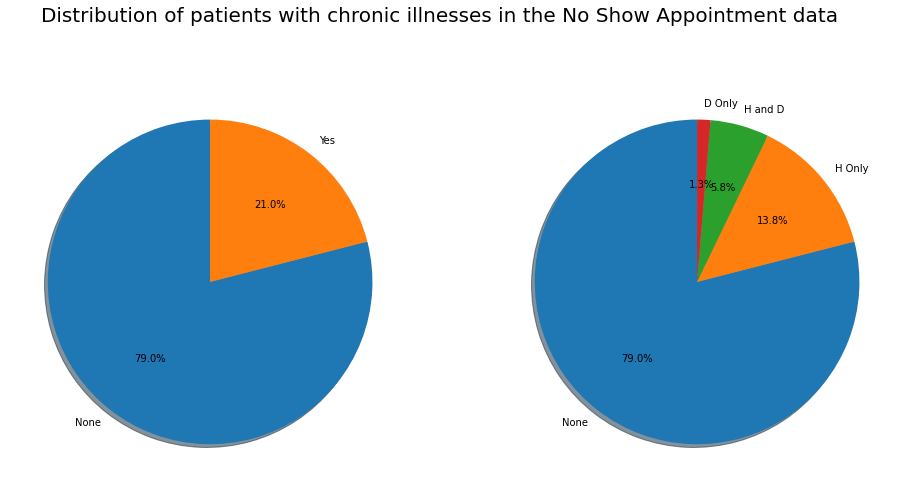

In [34]:
# Create pie plots of the patients with chronic illnesses
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].pie(dfhd['ChronicIllness'].value_counts(), labels=dfhd['ChronicIllness'].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=90)
ax[1].pie(dfhd['ChronicIllnessGrp'].value_counts(), labels=dfhd['ChronicIllnessGrp'].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=90)
fig.suptitle('Distribution of patients with chronic illnesses in the No Show Appointment data', fontsize=20);

In [35]:
## Create cross tabulations to obtain the frequency of the health conditions against the patients' attendance
crosstab_cn1 = pd.crosstab(dfhd['ChronicIllness'], dfhd['No-show'])
#crosstab_cn1['%absent'] = round((crosstab_cn1['Yes']/crosstab_cn1['No'])*100, 2)
crosstab_cn1

No-show,No,Yes
ChronicIllness,,
None,68913,18238
Yes,19134,4037


In [36]:
## Create cross tabulations to obtain the frequency of the each health condition(s) against the patients' attendance
crosstab_cn2 = pd.crosstab(dfhd['ChronicIllnessGrp'], dfhd['No-show'])
#crosstab_cn2['%absent'] = round((crosstab_cn2['Yes']/crosstab_cn2['No'])*100, 2)
crosstab_cn2

No-show,No,Yes
ChronicIllnessGrp,,
D Only,1167,289
H Only,12656,2615
H and D,5311,1133
None,68913,18238


In [37]:
## Create cross tabulations to explore the gender against the frequency of the health conditions
pd.crosstab(dfhd['ChronicIllness'], dfhd['Gender'])

Gender,F,M
ChronicIllness,,
None,55516,31635
Yes,16209,6962


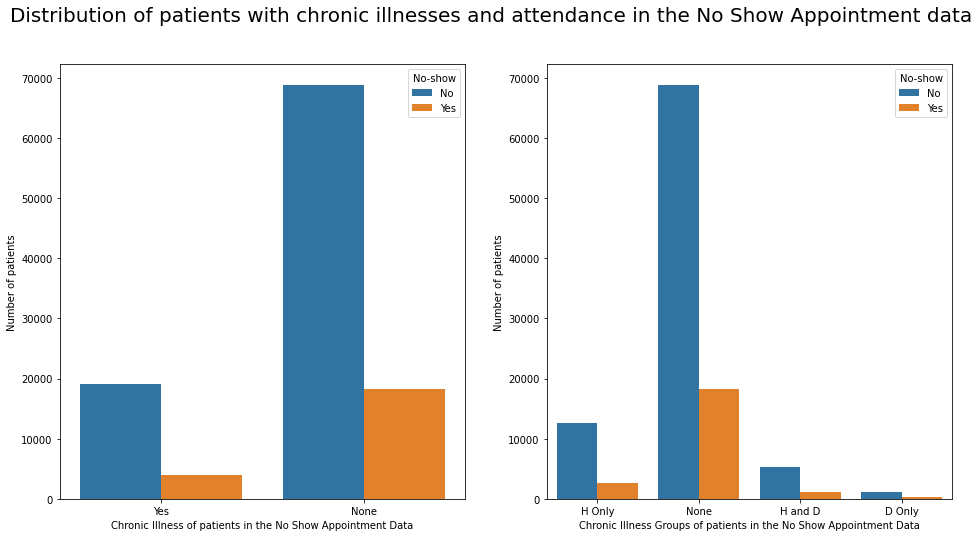

In [38]:
# Create bar plots of the frequency of patients with chronic illnesses and their attendance at appointment
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.countplot(ax=ax[0], x='ChronicIllness', hue='No-show', data=dfhd);
sns.countplot(ax=ax[1], x='ChronicIllnessGrp', hue='No-show', data=dfhd);
ax[0].set_xlabel('Chronic Illness of patients in the No Show Appointment Data')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Chronic Illness Groups of patients in the No Show Appointment Data')
ax[1].set_ylabel('Number of patients')
fig.suptitle('Distribution of patients with chronic illnesses and attendance in the No Show Appointment data', fontsize=20);

In [39]:
## Is there any significant difference in the number of patients present and absent at the appointments
# Using Chi Square test for the relationship between the chronic illness and the attendance of patients at appointments in a 2x2 table
PrintChiSquare(crosstab_cn1)

The Chi square value is 139.27 with a probability of 0.0 at a degree of freedom of 1


Expected Values: 
 [[69555. 17597.]
 [18493.  4679.]]


- _70.9% of the patients in the No Show Datasets were reported as not having either hypertension or diabetes, while the remaining 20.1% were reported having either hypertension or diabetes or both conditions at the same time_
- _The proportion of patients absent from their appointment due to chronic illness ranged approximately between 20-25%. Similar proportion was observed with patients who did not have any of the chronic illnesses_
- _The Chi square test indicates a statistically significant difference (P<0.05) in the number of patients having any chronic health conditions and absent at their appointments_

_Reference for Chi square test retrieved from [pythonfordatascienceorg](https://pythonfordatascienceorg.wordpress.com/chi-square-python/)_
_[Here](https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8)_

### Research Question 3 (Does scheduling impact their attendance at the appointments?) _Is the period between scheduled day and appointment day affecting the number of no-show appointments?_)

In [40]:
# Calculate the difference in time between the scheduled day and appointment day
dfsch = df[['ScheduledDay', 'AppointmentDay', 'No-show']].copy()
dfsch['Interval'] = (df['AppointmentDay']-df['ScheduledDay']) / pd.Timedelta(hours=1)
dfsch.head()

,ScheduledDay,AppointmentDay,No-show,Interval
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,No,-18.635556
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,No,-16.140833
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,No,-16.317778
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,No,-17.491944
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,No,-16.123056


> The presence of negative difference in the period between the scheduled day and appointment day indicates some of the patients were scheduled after their appointments

In [41]:
## Subset the population based on the scheduling of their appointments before or after
dfsch_after = dfsch[dfsch['Interval'] < 0]
dfsch_before = dfsch[dfsch['Interval'] > 0]

In [42]:
## Describe the measures of central tendency and spread of the patients scheduled after appointments
dfsch_after.groupby(['No-show'])['Interval'].describe()

,count,mean,std,min,25%,50%,75%,max
No-show,,,,,,,,
No,36696.0,-10.685586,3.022967,-20.748333,-13.249514,-9.752778,-8.121944,-6.160000
Yes,1793.0,-10.961880,4.792222,-157.822222,-13.471944,-9.914444,-8.218611,-6.446111


In [43]:
print(f"{len(dfsch_after)} patients in the No Show Appointment data were scheduled after their Appointment Day at an average of {round(dfsch_after['Interval'].mean(), 2)} hours")

38489 patients in the No Show Appointment data were scheduled after their Appointment Day at an average of -10.7 hours


_36,696 out of 38,489 (~95%) patients on the average showed up on the appointment day. **With the mean(std) of ~-10.7(3.0), I presume that majority of the patients were scheduled averagely on the same day of their appointments**_

> For those scheduled before the appointment day

In [44]:
print(f"{len(dfsch_before)} patients in the No Show Appointment data were scheduled before their Appointment Day at an average of {round(dfsch_before['Interval'].mean(), 2)} hours")

71833 patients in the No Show Appointment data were scheduled before their Appointment Day at an average of 363.91 hours


In [45]:
BreakDownByColumn(dfsch_before, 'No-show')

,No-show
No,51351
Yes,20482


_A total of 20,482 (~29%) of those that scheduled before the appointment date did not show up for their appointment_

In [46]:
dfsch_before.head()

,ScheduledDay,AppointmentDay,No-show,Interval
5,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,No,39.385833
6,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,Yes,32.913333
7,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,Yes,32.333889
9,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,No,35.193056
10,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,No,33.030278


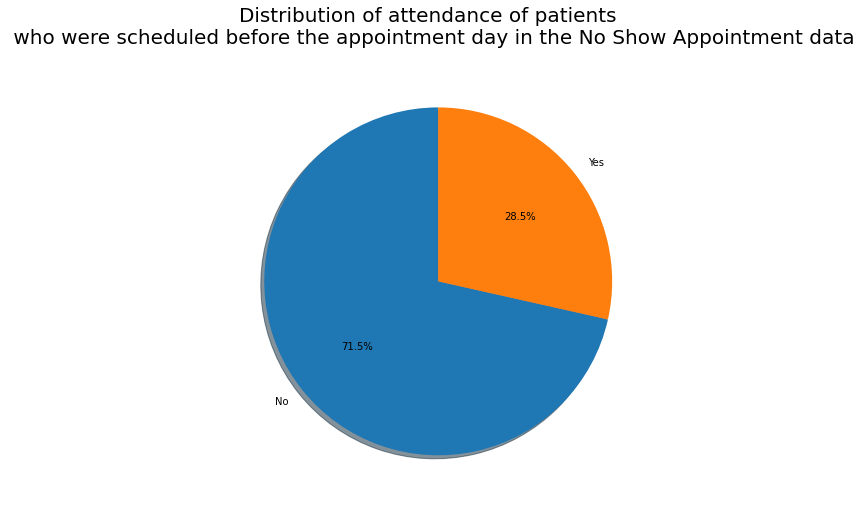

In [47]:
# Create a pie plot of the patients who were scheduled before their appointment dates to explore those that missed or attended their appointments
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.pie(dfsch_before['No-show'].value_counts(), labels=dfsch_before['No-show'].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=90)
fig.suptitle('Distribution of attendance of patients \n who were scheduled before the appointment day in the No Show Appointment data', fontsize=20);

In [48]:
dfsch_before.groupby(['No-show'])['Interval'].describe()

,count,mean,std,min,25%,50%,75%,max
No-show,,,,,,,,
No,51351.0,348.931169,393.761071,3.272222,83.334444,183.938611,495.537500,4285.288333
Yes,20482.0,401.478228,398.523206,3.320278,109.778958,301.378194,590.921736,4285.316944


_The spread (std) of the time around the mean is too wide. This spread indicates that some patients had a lot of time in hours between the scheduled date and appointment date compared to the avarage of those who scheduled before appointment_

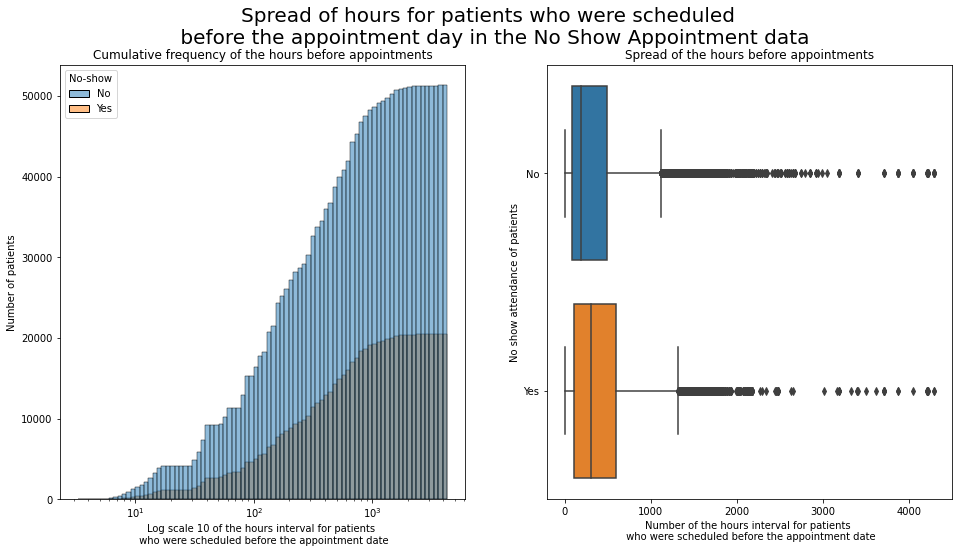

In [49]:
# Create plots to show the spread of the time difference of the patients who scheduled before their appointment day
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.histplot(ax=ax[0], data=dfsch_before, x='Interval', hue='No-show', log_scale=True, cumulative=True);
ax[0].set_title('Cumulative frequency of the hours before appointments')
ax[0].set_xlabel('Log scale 10 of the hours interval for patients \n who were scheduled before the appointment date')
ax[0].set_ylabel('Number of patients')
sns.boxplot(ax=ax[1], data=dfsch_before, x='Interval', y='No-show');
ax[1].set_title('Spread of the hours before appointments')
ax[1].set_xlabel('Number of the hours interval for patients \n who were scheduled before the appointment date')
ax[1].set_ylabel('No show attendance of patients')
fig.suptitle('Spread of hours for patients who were scheduled \n before the appointment day in the No Show Appointment data', fontsize=20);

In [50]:
## How many outliers in the data for those that scheduled before their appointments and were present
Nodf = dfsch_before[dfsch_before['No-show']=='No']
NoQ3 = np.quantile(Nodf['Interval'], 0.75)
NoQ1 = np.quantile(Nodf['Interval'], 0.25)
Nolower_boundary = round(Q1 - 1.5 *(NoQ3-NoQ1), 2)
Noupper_boundary = round(Q3 + 1.5 *(NoQ3-NoQ1), 2)
print(f"There are {len(Nodf[Nodf['Interval'] < Nolower_boundary])} outliers lesser than the lower boundary of {Nolower_boundary} hours")
print(f"There are {len(Nodf[Nodf['Interval'] > Noupper_boundary])} outliers greater than the upper boundary of {Noupper_boundary} hours")

There are 0 outliers lesser than the lower boundary of -600.3 hours
There are 8195 outliers greater than the upper boundary of 673.3 hours


In [51]:
## How many outliers in the data for those that scheduled before their appointments and were absent
Yesdf = dfsch_before[dfsch_before['No-show']=='Yes']
YesQ3 = np.quantile(Yesdf['Interval'], 0.75)
YesQ1 = np.quantile(Yesdf['Interval'], 0.25)
Yeslower_boundary = round(Q1 - 1.5 *(YesQ3-YesQ1), 2)
Yesupper_boundary = round(Q3 + 1.5 *(YesQ3-YesQ1), 2)
print(f"There are {len(Yesdf[Yesdf['Interval'] < Yeslower_boundary])} outliers lesser than the lower boundary of {Yeslower_boundary} hours")
print(f"There are {len(Yesdf[Yesdf['Interval'] > Yesupper_boundary])} outliers greater than the upper boundary of {Yesupper_boundary} hours")

There are 0 outliers lesser than the lower boundary of -703.71 hours
There are 2956 outliers greater than the upper boundary of 776.71 hours


In [52]:
## Is there any significant difference in the number of hours scheduled before appointments and attendance
# Using Indenpendent T-test for the difference between the time periods and the attendance of patients at appointments
stats.ttest_ind(Nodf['Interval'], Yesdf['Interval'])

Ttest_indResult(statistic=-16.09210373719385, pvalue=3.664580612476308e-58)

- _The cumulative frequency of the log scale of the number of hours plateaued for both attendance after rising to a point_
- _The spread in the boxplot shows extra number of hours as outliers beyond the 75th percentile_
- _The T-test indicates a statistically significant difference (P<0.05) in the time periods scheduled before appointments and the attendance of patients at their appointments_

- _Reference for calculating the [time difference](https://stackoverflow.com/questions/22923775/calculate-time-difference-between-two-pandas-columns-in-hours-and-minutes)_
- _Reference for [HistPlots with Seaborn](https://seaborn.pydata.org/generated/seaborn.histplot.html), [BoxPlots with Seaborn](https://seaborn.pydata.org/generated/seaborn.histplot.html)_
- _Reference for [Independent T-tests](https://www.pythonfordatascience.org/independent-samples-t-test-python/)_

### Research Question 4 (Do SMS reminders decrease the number of absences? _Do SMS reminders increase the attendance on appointment days?_)

In [53]:
## Make a copy of the original data
dfsms = df[['Age', 'Gender', 'SMS_received', 'No-show']].copy()
dfsms['AgeGrp'] = dfsms['Age'].apply(AgeGroups)
dfsms['Gender'] = dfsms['Gender'].apply(lambda x : 'Male' if x=='M' else 'Female')
dfsms['SMS_received'] = dfsms['SMS_received'].apply(lambda x : 'Yes, Received' if x==1 else 'No SMS')
dfsms.head()

,Age,Gender,SMS_received,No-show,AgeGrp
0,62,Female,No SMS,No,Senior Adult
1,56,Male,No SMS,No,Adult
2,62,Female,No SMS,No,Senior Adult
3,8,Female,No SMS,No,Child
4,56,Female,No SMS,No,Adult


In [54]:
## Create cross tabulations to obtain the frequency of patients that received SMS against their attendance
crosstab_sms = pd.crosstab(dfsms['SMS_received'], dfsms['No-show'])
#crosstab_sms['%absent'] = round((crosstab_sms['Yes']/crosstab_sms['No'])*100, 2)
crosstab_sms

No-show,No,Yes
SMS_received,,
No SMS,62388,12500
"Yes, Received",25659,9775


In [55]:
pd.DataFrame(dfsms.groupby(['Gender','SMS_received'])['No-show'].value_counts())

No-show
Gender SMS_received  No-show         
Female No SMS        No         39697
                     Yes         7852
       Yes, Received No         17463
                     Yes         6713
Male   No SMS        No         22691
                     Yes         4648
       Yes, Received No          8196
                     Yes         3062

In [56]:
#pd.DataFrame(dfsms.groupby(['AgeGrp','SMS_received'])['No-show'].value_counts())

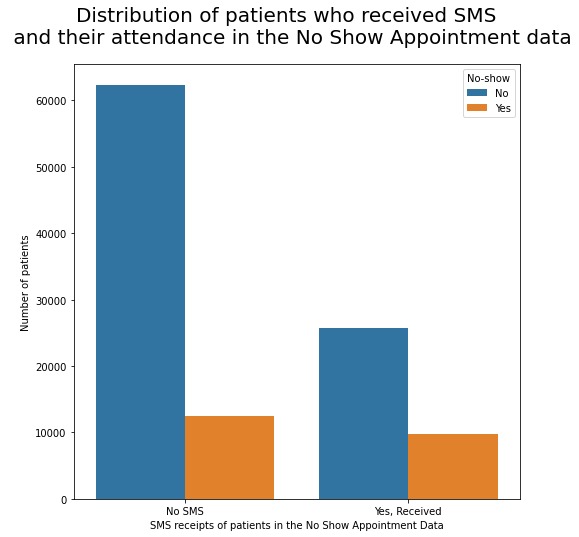

In [57]:
# Create a bar plot of the patients with chronic illnesses and their attendance at appointment
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax = sns.countplot(x='SMS_received', hue='No-show', data=dfsms);
ax.set_xlabel('SMS receipts of patients in the No Show Appointment Data')
ax.set_ylabel('Number of patients')
fig.suptitle('Distribution of patients who received SMS \n and their attendance in the No Show Appointment data', fontsize=20);

In [58]:
## Is there any significant difference in the number of patients present and absent at the appointments
#chi2, p, dof, expected = stats.chi2_contingency(crosstab)
# Using Chi Square test for the relationship between the chronic illness and the attendance of patients at appointments
PrintChiSquare(crosstab_sms)

The Chi square value is 1771.1 with a probability of 0.0 at a degree of freedom of 1


Expected Values: 
 [[59768. 15121.]
 [28280.  7155.]]


- _~56.6%(62,388) out of 110,322 patients (more than half) did not received SMS as reminders for their appointment, and were present at attendance. This proportion is high and may be worthy of note on other factor that may have encouraged this number rather than the SMS reminders_
- _The Chi square test indicates a statistically significant difference (P<0.05) in the number of patients receiving SMS and yet absent at their appointments (~8.9% of the population)_

<a id='conclusions'></a>
## Conclusions _(limited to my investigations)_
- The No Show Appointment dataset shows a large proportion of adults above 20 years of age (72.4%) scheduled for appointments in the various hospitals. There are more women(65.0%) than men(35.0%).
- The proportion of patients absent from their appointment due to chronic illness ranged approximately between 20-25% depending on the illness, was significant when compared to those without any reported illnesses.
- The scheduling period for the patient reported two trends where:
>- i. 38,489 out of 110,322 patients (~ 34.9%) were scheduled after their appointments. The records of their schedules must have been entered after their appointments (which they missed or where re-scheduled).
>- ii. others (~ 65.1%) were scheduled before their appointments for an average time period of about 348.93 hours (~ 14 days) for those that showed up for their appointments. The plateau phase observed on the cumulative frequency of patients who scheduled before appointments may be due to the presence of _outliers_, as individuals who gave a very long gap or interval between the schedule aan appointment dates.
- Other factors may contribute to the attendance of patients who did not receive the SMS, but the proportion of patients who received the SMS and yet were absent at their appointments (~ 8.9% of the population) was significant.

## Limitations / Challenges
- Despite the large number of observations in the dataset, getting the real picture of the attendance of the patients requires deeper exploration and feature extraction to breakdown the impacts of the recorded characteristics.

In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset-Workfile.ipynb'])

1